Korrektur: Patrick Weinkauf; pawei114

# Raphael Kaya

# Algorithmen in der Bioinformatik – Übungsblatt 10
## Abgabe: Freitag, 5.7., 10:30 Uhr

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [16]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 10.1 (3/9 Punkte)

Geben Sie einen Baum an, der hierarchisches Clustering mit durchschnittlichem Cluster-Abstand für die angegebene Distanzmatrix repräsentiert. Zeigen Sie alle Zwischenschritte, indem Sie die ausgerechneten Matrizen angeben. Sie können auf 2 Nachkommastellen runden. Falls Sie eine Wahlmöglichkeit haben, wählen Sie ein beliebiges Paar.

**Hinweis:** Der durchschnittliche Cluster-Abstand von beispielsweise $g_0$ und $g_1$ zu $g_2$ ist $10.6$.

\begin{array}{r|rrrrrrrrrr}
    & g_0 & g_1 & g_2 & g_3 & g_4 & g_5 & g_6 & g_7 & g_8 & g_9 \\ \hline
g_0 & 0.0 & 8.1 & 9.2 & 7.7 & 9.3 & 2.3 & 5.1 &10.2 & 6.1 & 7.0  \\
g_1 & 8.1 & 0.0 &12.0 & 0.9 &12.0 & 9.5 &10.1 &12.8 & 2.0 & 1.0  \\
g_2 & 9.2 &12.0 & 0.0 &11.2 & 0.7 &11.1 & 8.1 & 1.1 &10.5 &11.5  \\
g_3 & 7.7 & 0.9 &11.2 & 0.0 &11.2 & 9.2 & 9.5 &12.0 & 1.6 & 1.1  \\
g_4 & 9.3 &12.0 & 0.7 &11.2 & 0.0 &11.2 & 8.5 & 1.0 &10.6 &11.6  \\
g_5 & 2.3 & 9.5 &11.1 & 9.2 &11.2 & 0.0 & 5.6 &12.1 & 7.7 & 8.5  \\
g_6 & 5.1 &10.1 & 8.1 & 9.5 & 8.5 & 5.6 & 0.0 & 9.1 & 8.3 & 9.3  \\
g_7 &10.2 &12.8 & 1.1 &12.0 & 1.0 &12.1 & 9.1 & 0.0 &11.4 &12.4  \\
g_8 & 6.1 & 2.0 &10.5 & 1.6 &10.6 & 7.7 & 8.3 &11.4 & 0.0 & 1.1  \\
g_9 & 7.0 & 1.0 &11.5 & 1.1 &11.6 & 8.5 & 9.3 &12.4 & 1.1 & 0.0  \\
\end{array}

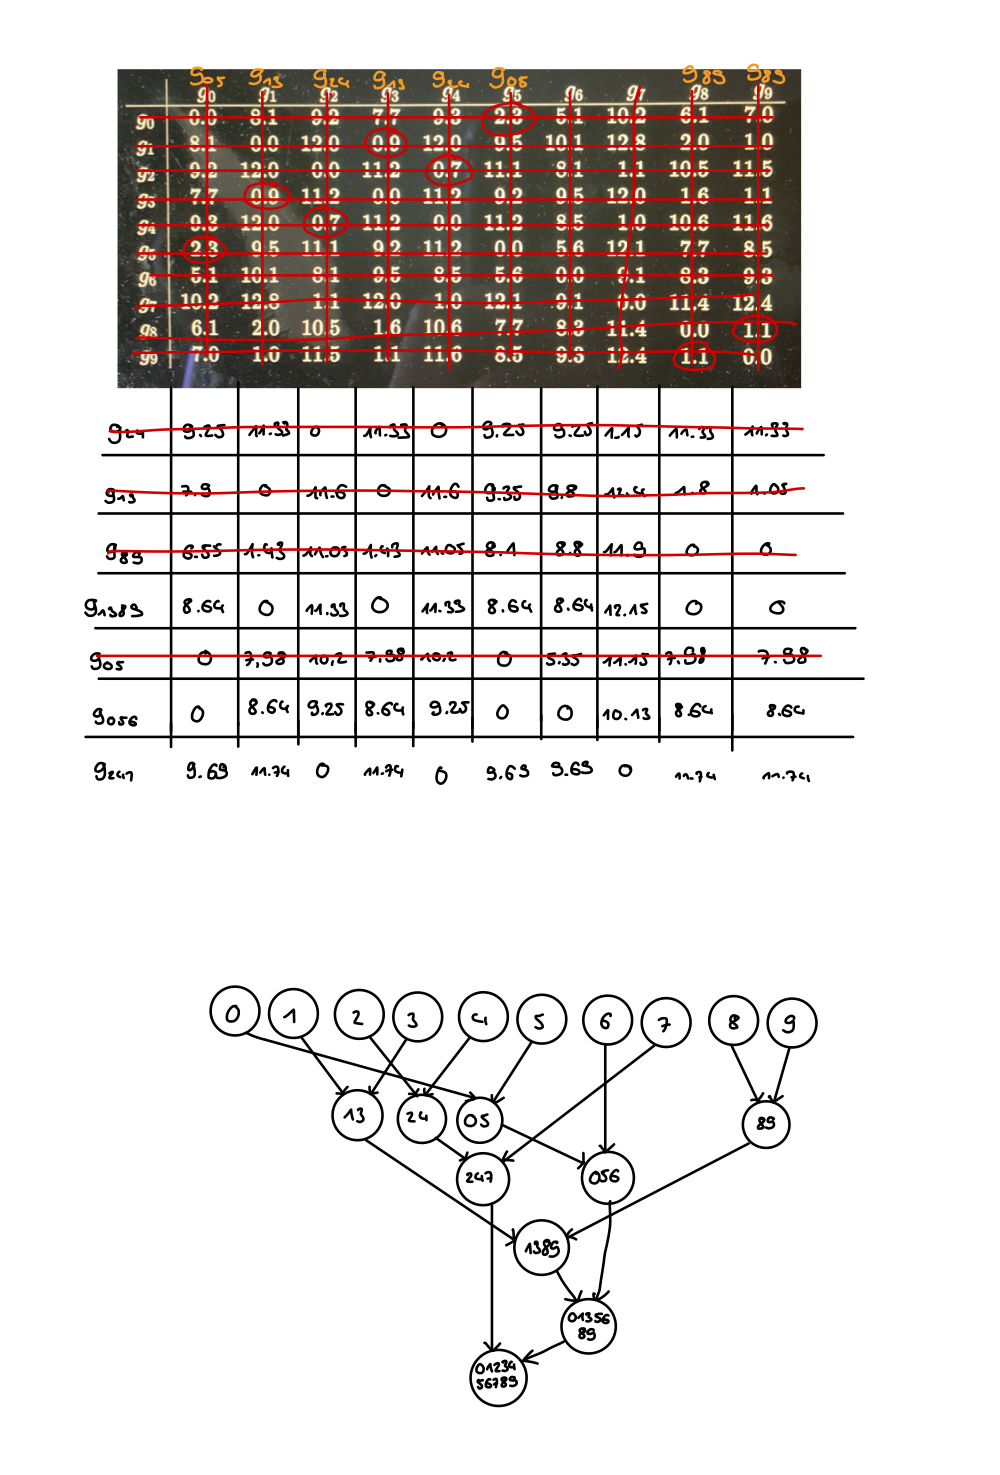

In [17]:
from IPython.display import Image
Image('HCluster.jpeg')

du solltest jede Matrix einzeln aufschreiben. Außerdem kann man anhand des Dendogramms nicht die Reihenfolge des Zusammenführung erkennen.

## Aufgabe 10.2 (10/11 Punkte, 7/7 + 1.5/2 + 1.5/2)

(a) Implementieren Sie den Lloyd-Algorithmus für $n$-dimensionales $k$-means-Clustering für $n = 3$. (Ihr Programm darf auch für andere $n$ funktionieren.) Ihr Programm soll die Anzahl an Iterationen ausgeben und 2 Rückgabewerte haben: die Koordinaten der Clusterzentren und die zugewiesenen Datenpunkte für jedes Clusterzentrum.

Eine mögliche Rückgabe könnte für $n = 2$ und $k = 3$ z. B. so aussehen:

Anzahl an Iterationen:<br>
3

Clusterzentren:<br>
[[0.753 0.883]<br>
 [0.114 0.489]<br>
 [0.505 0.224]]
 
Zugewiesene Datenpunkte je Clusterzentrum:<br>
{0: [[0.759 0.823], [0.693 0.903], [0.758 0.778]],<br>
1: [[0.033 0.560], [0.131 0.428], [0.176 0.463]],<br>
2: [[0.586 0.224], [0.498 0.402], [0.510 0.198]]}<br>

In [18]:
import numpy as np

def distance(punkt1, punkt2):
    return np.linalg.norm(np.array(punkt1) - np.array(punkt2))

def k_means_one_iteration(centers, datapoints):
    cluster = {i: [] for i in range(len(centers))}

    for point in datapoints:
        niedrigster_abstand = float('inf')
        naechstes_cluster = None
    
        for i, zentrum in enumerate(centers):
            abstand = distance(point, zentrum)
            if abstand < niedrigster_abstand:
                niedrigster_abstand = abstand
                naechstes_cluster = i
        
        cluster[naechstes_cluster].append(point)
    
    neue_centers = []
    for i in range(len(centers)):
        if cluster[i]:  
            neues_zentrum = np.mean(cluster[i], axis=0)
        else:
            neues_zentrum = centers[i]  
        neue_centers.append(neues_zentrum)

    return neue_centers, cluster

def k_means_lloyd(datapoints, k):
    centers = datapoints[np.random.choice(datapoints.shape[0], k, replace=False)]
    n=2
    for iteration in range(n):
        new_centers, cluster = k_means_one_iteration(centers, datapoints)
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    
    print("Anzahl Iterationen:\n" + str(n))
    

    print("Clusterzentren:")
    for zentrum in centers:
        print(f'[{zentrum[0]:.3f} {zentrum[1]:.3f}]')

    print("\nZugewiesene Datenpunkte je Clusterzentrum:")
    for key, punkte in cluster.items():
        print(f'{key}: [', end='')
        for punkt in punkte:
            print(f'[{punkt[0]:.3f} {punkt[1]:.3f}]', end=', ')
        print(']')
    
    return centers, cluster

(b) Betrachten Sie die Datei "dataset.tsv", die sich im selben Ordner wie dieses Jupyter Notebook befindet. In dieser Datei repräsentiert eine Zeile einen Datenpunkt, wobei die einzelnen Koordinaten tabsepariert sind.

Wenden Sie den Lloyd-Algorithmus aus (a) mit $k = 4$ auf den Datensatz an. Visualisieren Sie Ihre Lösung, indem Sie die Datenpunkte und Clusterzentren in geeigneter Weise plotten. Wie beurteilen Sie Ihr Clustering auf diesem Datensatz?

**Hinweis:** Die Funktion `add_subplot(111, projection='3d')` aus der Library `mpl_toolkits.mplot3d.Axes3D` könnte nützlich sein.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read(dateiname):
    punkte = []
    with open(dateiname, 'r') as file:
        for line in file:
            values = line.strip().split('\t')
            punkt = [float(value) for value in values]
            punkte.append(punkt)
    return np.array(punkte)


def visualize_dataset(filename, k):
    datapoints = read(filename)
    centers, cluster = k_means_lloyd(datapoints, k)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for key, punkte in cluster.items():
        punkte = np.array(punkte)
        ax.scatter(punkte[:, 0], punkte[:, 1], punkte[:, 2], c=colors[key % len(colors)], label=f'Cluster {key}')

    centers = np.array(centers)
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='k', marker='x', s=100, label='Zentren')

    ax.set_xlabel('X Achse')
    ax.set_ylabel('Y Achse')
    ax.set_zlabel('Z Achse')
    plt.legend()
    plt.show()


Anzahl Iterationen:
2
Clusterzentren:
[0.781 0.217]
[0.333 0.179]
[0.598 0.818]
[0.117 0.713]

Zugewiesene Datenpunkte je Clusterzentrum:
0: [[0.918 0.225], [0.777 0.108], [0.898 0.110], [0.878 0.231], [0.906 0.126], [0.813 0.028], [0.928 0.151], [0.905 0.079], [0.780 0.081], [0.776 0.077], [0.945 0.091], [0.817 0.180], [0.808 0.164], [0.793 0.110], [0.879 0.233], [0.867 0.154], [0.962 0.159], [0.884 0.184], [0.787 0.210], [0.980 0.250], [0.919 0.038], [0.924 0.009], [0.985 0.187], [0.779 0.216], [0.978 0.067], [0.978 0.202], [0.893 0.079], [0.997 0.243], [0.983 0.072], [0.864 0.043], [0.978 0.052], [0.838 0.089], [0.949 0.174], [0.920 0.207], [0.759 0.099], [0.961 0.080], [0.773 0.017], [0.762 0.108], [0.794 0.232], [0.779 0.181], [0.827 0.073], [0.879 0.054], [0.964 0.062], [0.855 0.091], [0.959 0.126], [0.796 0.056], [0.937 0.068], [0.787 0.220], [0.923 0.059], [0.772 0.236], [0.890 0.215], [0.881 0.014], [0.949 0.136], [0.791 0.075], [0.798 0.242], [0.888 0.153], [0.920 0.161], [0.

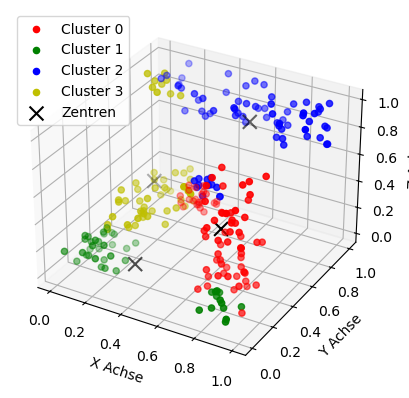

In [20]:
visualize_dataset('dataset.tsv', 4)

(c) Betrachten Sie die Datei "mysterious_dataset.tsv", die sich im selben Ordner wie dieses Jupyter Notebook befindet. In dieser Datei repräsentiert eine Zeile einen Datenpunkt, wobei die einzelnen Koordinaten tabsepariert sind.

Wenden Sie den Lloyd-Algorithmus aus (a) mit $k = 3$ auf den Datensatz an. Visualisieren Sie Ihre Lösung, indem Sie die Datenpunkte und Clusterzentren in geeigneter Weise plotten. Wie beurteilen Sie Ihr Clustering auf diesem Datensatz?

**Hinweis:** Die Funktion `add_subplot(111, projection='3d')` aus der Library `mpl_toolkits.mplot3d.Axes3D` könnte nützlich sein.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read(dateiname):
    punkte = []
    with open(dateiname, 'r') as file:
        for line in file:
            values = line.strip().split('\t')
            punkt = [float(value) for value in values]
            punkte.append(punkt)
    return np.array(punkte)


def visualize_dataset(filename, k):
    datapoints = read(filename)
    centers, cluster = k_means_lloyd(datapoints, k)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for key, punkte in cluster.items():
        punkte = np.array(punkte)
        ax.scatter(punkte[:, 0], punkte[:, 1], punkte[:, 2], c=colors[key % len(colors)], label=f'Cluster {key}')

    centers = np.array(centers)
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='k', marker='x', s=100, label='Zentren')

    ax.set_xlabel('X Achse')
    ax.set_ylabel('Y Achse')
    ax.set_zlabel('Z Achse')
    plt.legend()
    plt.show()


Anzahl Iterationen:
2
Clusterzentren:
[9.511 19.133]
[19.714 11.037]
[24.349 22.855]

Zugewiesene Datenpunkte je Clusterzentrum:
0: [[8.150 10.350], [7.950 10.950], [7.750 11.700], [7.550 12.350], [7.450 13.000], [7.350 13.750], [7.300 14.350], [7.350 14.950], [7.350 15.750], [7.550 16.350], [7.700 16.950], [7.800 17.550], [8.050 18.150], [8.300 18.750], [8.650 19.300], [8.900 19.850], [9.300 20.300], [9.650 20.800], [10.200 21.250], [10.600 21.650], [11.100 22.150], [11.550 22.450], [11.950 22.700], [12.550 23.000], [13.050 23.200], [13.450 23.400], [14.000 23.550], [14.550 23.600], [15.100 23.750], [15.700 23.750], [11.550 14.350], [11.550 14.700], [11.600 15.250], [11.650 15.700], [11.800 16.050], [11.850 16.500], [12.000 16.750], [12.150 17.200], [12.300 17.600], [12.550 17.850], [12.800 18.050], [13.100 18.400], [13.300 18.600], [13.550 18.850], [13.800 19.050], [14.150 19.250], [14.450 19.500], [14.850 19.550], [15.000 19.700], [15.250 19.700], [3.900 9.600], [3.550 10.650], [3.3

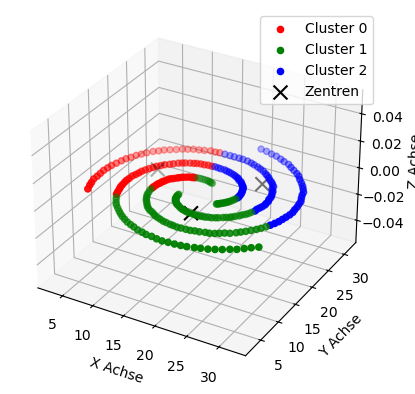

In [22]:
visualize_dataset('mysterious_dataset.tsv', 3)

Fehlende Bewertung des Clusterings.